<a href="https://colab.research.google.com/github/JMCastle98/Data_Science_BEDU_Prototype/blob/main/Recursos_prototype/Gr%C3%A1ficas_expo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torneos en la última década

In [ ]:
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
historical = pd.read_csv('https://raw.githubusercontent.com/JMCastle98/Data_Science_BEDU_Prototype/main/Data/HistoricalEsportData.csv',encoding='UTF')

In [ ]:
historical['Date'] = historical['Date'].apply(datetime.strptime, args=('%d/%m/%Y',))
historical['Month'] = historical['Date'].dt.month
historical['Year'] = historical['Date'].dt.year
historical.head()

,Date,Game,Earnings,Players,Tournaments,Month,Year
0,1998-01-01,QuakeWorld,15000.0,8,1,1,1998
1,1998-05-01,Quake II,14600.0,4,1,5,1998
2,1998-07-01,Quake II,15000.0,5,1,7,1998
3,1998-07-01,QuakeWorld,6500.0,4,1,7,1998
4,1998-11-01,Quake II,36600.0,13,2,11,1998


In [ ]:
historical[(historical['Year'] > 2010) & (historical['Year'] < 2021)].sum()

Game           StarCraft IIStarCraft: Brood WarCounter-Strike...
Earnings                                              8.8707e+08
Players                                                   302851
Tournaments                                                38714
Month                                                      34066
Year                                                    10421145
dtype: object

In [ ]:
historical = historical[historical['Year'] < 2021]
variables = historical.groupby(['Date']).sum()

In [ ]:
historical = historical[ (historical['Year'] > 2010) & (historical['Year'] < 2021)]
variables = historical.groupby(['Year']).sum()
variables

,Earnings,Players,Tournaments,Month
Year,,,,
2011,1.055105e+07,7501,1659,1708
2012,1.417576e+07,10279,1987,2051
2013,2.226329e+07,12794,2297,2254
2014,3.762319e+07,17460,3135,2546
2015,6.718330e+07,30782,5261,3572
2016,9.814178e+07,34138,4793,3399
2017,1.166442e+08,39480,4862,4037
2018,1.653498e+08,46286,4701,4715
2019,2.362341e+08,55353,5585,5359


In [ ]:
tournaments_ts = variables.reset_index()[['Year','Tournaments']]

In [ ]:
tournaments_ts

,Year,Tournaments
0,2011,1659
1,2012,1987
2,2013,2297
3,2014,3135
4,2015,5261
5,2016,4793
6,2017,4862
7,2018,4701
8,2019,5585
9,2020,4434


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


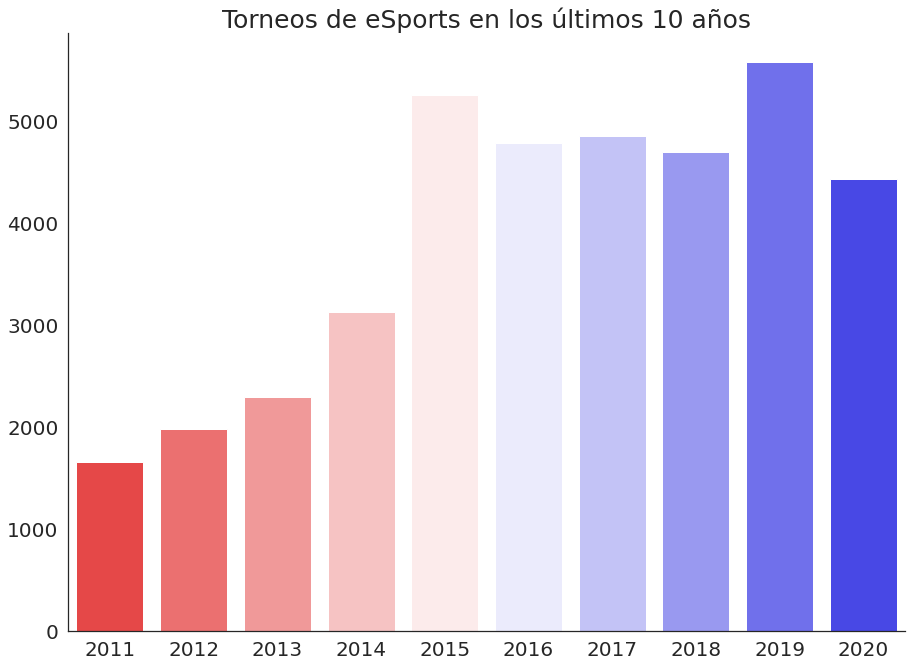

In [ ]:
plt.figure(figsize=[15, 11])
sns.set(style="white")
sns.barplot(tournaments_ts['Year'],tournaments_ts['Tournaments'],palette='bwr_r')

sns.despine()            
plt.title("Torneos de eSports en los últimos 10 años", fontsize = 25)
plt.ylabel("", fontsize = 20)
plt.yticks(fontsize=20)
plt.xlabel("", fontsize =20)
plt.xticks(fontsize=20)
plt.show()

# Equipos con los mejores premios (Top 5)

In [ ]:
teams = pd.read_csv('https://raw.githubusercontent.com/LKXoro/BEDU-Rstudio-postworks/main/Proyecto/DataSets/highest_earning_teams.csv',encoding='UTF')

In [ ]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [ ]:
teams[teams['TotalUSDPrize'] == max(teams.TotalUSDPrize) ]

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena


In [ ]:
prize = teams.groupby(by='Genre')['TotalUSDPrize'].max()
prize = genres.sort_values(ascending=False)
prize

Genre
Multiplayer Online Battle Arena    33810636.13
First-Person Shooter                8503918.81
Battle Royale                       3708150.00
Strategy                            2546572.70
Collectible Card Game               1656839.93
Name: TotalUSDPrize, dtype: float64

In [ ]:
prize[2]

3708150.0

In [ ]:
top = []
for i in range(0,len(prize)):
     team = teams[teams['TotalUSDPrize'] == prize[i]]
     if i == 0: 
         top = team
     else: 
         top = top.append(team)


In [ ]:
top.sort_values(by='TotalUSDPrize',ascending=False)

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
400,466,Astralis,8503918.81,95,Counter-Strike: Global Offensive,First-Person Shooter
300,571,Lazarus,3708150.00,24,Fortnite,Battle Royale
100,181,Jin Air Green Wings,2546572.70,379,Starcraft II,Strategy
800,132,MVP,1656839.93,24,Hearthstone,Collectible Card Game


# Espectadores en Streaming

In [ ]:
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
twitch = pd.read_csv('https://raw.githubusercontent.com/JMCastle98/Data_Science_BEDU_Prototype/main/Data/Twitch_game_data.csv')

In [ ]:
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [ ]:
twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12950 entries, 0 to 12949
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              12950 non-null  int64  
 1   Game              12949 non-null  object 
 2   Month             12950 non-null  int64  
 3   Year              12950 non-null  int64  
 4   Hours_watched     12950 non-null  int64  
 5   Hours_Streamed    12950 non-null  object 
 6   Peak_viewers      12950 non-null  int64  
 7   Peak_channels     12950 non-null  int64  
 8   Streamers         12950 non-null  int64  
 9   Avg_viewers       12950 non-null  int64  
 10  Avg_channels      12950 non-null  int64  
 11  Avg_viewer_ratio  12950 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.2+ MB


In [ ]:
twitch.describe()

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,12950.000000,12950.000000,12950.000000,1.295000e+04,1.295000e+04,12950.000000,1.295000e+04,12950.000000,12950.000000,12950.000000
mean,100.596525,6.250965,2018.239382,4.373663e+06,5.049613e+04,535.292510,1.630707e+04,5999.024015,198.139151,83.856490
std,57.819991,3.459041,1.573438,1.551168e+07,1.204230e+05,2546.705423,5.388798e+04,21287.347288,727.151657,376.645129
min,1.000000,1.000000,2016.000000,8.981100e+04,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,2.270000
25%,50.000000,3.000000,2017.000000,3.365068e+05,7.740500e+03,48.000000,1.360250e+03,461.000000,15.000000,15.950000
50%,101.000000,6.000000,2018.000000,7.326375e+05,1.861250e+04,111.000000,3.833000e+03,1006.000000,39.000000,29.040000
75%,151.000000,9.000000,2020.000000,2.031406e+06,4.226725e+04,293.000000,1.008975e+04,2776.750000,111.000000,57.980000
max,200.000000,12.000000,2021.000000,3.445520e+08,3.123208e+06,129860.000000,1.013029e+06,479209.000000,13789.000000,13601.870000


In [ ]:
twitch_2020 = twitch[ (twitch['Year'] == 2020) & (twitch['Game'] != 'Just Chatting') & (twitch['Game'] != 'Special Events') ]

In [ ]:
avg_2020 = twitch_2020.groupby(by='Game')['Avg_viewers'].sum().sort_values(ascending = False)
top_2020 = avg_2020.iloc[0:10].sort_values(ascending = True)
top_2020.rename(index={'Counter-Strike: Global Offensive':'Counter-Strike: GO'},inplace=True)

In [ ]:
top_2020

Game
Among Us                  573899
World of Warcraft         620496
Dota 2                    680206
Minecraft                 697819
Counter-Strike: GO        977699
Call of Duty: Warzone    1105943
VALORANT                 1117736
Grand Theft Auto V       1126246
Fortnite                 1457709
League of Legends        2126244
Name: Avg_viewers, dtype: int64

In [ ]:
top_2020 = top_2020/1e6
top_2020

Game
Among Us                 0.573899
World of Warcraft        0.620496
Dota 2                   0.680206
Minecraft                0.697819
Counter-Strike: GO       0.977699
Call of Duty: Warzone    1.105943
VALORANT                 1.117736
Grand Theft Auto V       1.126246
Fortnite                 1.457709
League of Legends        2.126244
Name: Avg_viewers, dtype: float64

In [ ]:
top_2020.sum()

10.483997

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text major ticklabel objects>)

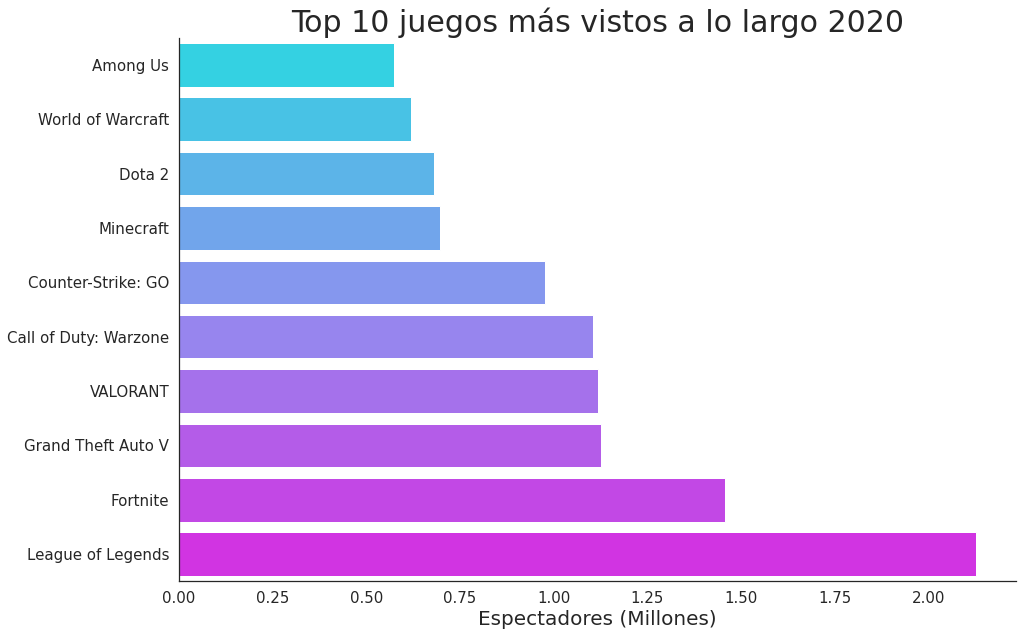

In [ ]:
plt.figure(figsize=[15, 10])
sns.set(style="white")
sns.barplot(x=top_2020, y=top_2020.index,palette='cool')   
sns.despine()        
plt.title("Top 10 juegos más vistos a lo largo 2020", fontsize = 30)
plt.ylabel("", fontsize = 20)
plt.yticks(fontsize=15)
plt.xlabel("Espectadores (Millones)", fontsize =20)
plt.xticks(fontsize=15)

# Duracion de partidas


Sea PandaScore_get_matches() la función que realiza peticiones a nuestra API sobre los enfrentamientos de un juego:

In [ ]:
import pandas as pd 
import math as mt
from datetime import *
import requests 

def PandaScore_get_matches(juego): #Definimos nuestra función
    if isinstance(juego, str): #Nos aseguramos que los argumentos sean de tipo str
        informacion = 'matches'
        registros = 100 #Establecemos el número de registros por página
        token = 'V3U1fnnWozJi3bbhZfrxdiAmN4-XWnX_4g6i_6iauwwh7w-V8Ns' #Token de acceso
        url = f"https://api.pandascore.co/{juego}/{informacion}?page[size]={registros}&token={token}" #URL con los parámetros deseados
        response = requests.get(url) #Realizamos la petición
        if response.status_code == 200: #Si todo salió bien continuamos
            Iteraciones = mt.ceil(float(response.headers['X-Total'])/registros) #Calculamos el número de páginas en base a todos los registros que hay en la API
            #Al dividir el número total de registros entre los registros solicitados obtenemos un aproximado, para asegurar que tomaremos todos, redondeamos al entero más alto
            for i in range(1,Iteraciones+1): #Ciclo for para obtener todos los registros de cada página
                url = f"https://api.pandascore.co/{juego}/{informacion}?page[size]={registros}&page[number]={i}&token=V3U1fnnWozJi3bbhZfrxdiAmN4-XWnX_4g6i_6iauwwh7w-V8Ns"
                #URL el parámetro de página deseada
                response = requests.get(url) #Realizamos la petición correspondiente
                data = response.json() #Transformamos la respuesta 
                if i == 1: #En la primer iteración se crea un Dataframe
                    df_matches = pd.DataFrame.from_dict(data)
                else: #En el resto de iteraciones se van añadiendo los nuevos registros
                    df_matches = df_matches.append(pd.DataFrame.from_dict(data),ignore_index=True)                    
            return df_matches # Finalmente se devuelve el Dataframe con todos los registros limpios y ordenados
        else: #Si la petición no se ejecutó correctamente mandamos un mensaje con el error devuelto
            return 'Error de petición: '+str(response.status_code)  
    else: #Si los argumentos no son de tipo str regresamos un mensaje
        return 'Por favor coloque un argumento válido en formato string.'

Además, sea df_matches_clean() la función que elimnará campos indeseados:

In [ ]:
def df_matches_clean(df_matches):
  ########### Limpieza de datos
   campos_no_deseados = ['videogame', 'slug', 'tournament', 'league', 'serie', 'streams', 'modified_at', 'games',
                      'game_advantage', 'scheduled_at', 'original_scheduled_at', 'detailed_stats','live',
                      'match_type', 'videogame_version', 'live_embed_url', 'id'] 

   df_matches_temp = df_matches.drop(columns=campos_no_deseados) #Limpiamos campos que no nos son de utilidad
   df_matches_finished = df_matches_temp[ df_matches_temp['status'] == 'finished' ] #Dejamos solo los enfrentamientos que han terminado
   df_matches_finished_clean = df_matches_finished.dropna(subset=['begin_at', 'end_at']) #Eliminamos algunos valores nulos de las fechas
   df_matches_ordenado = df_matches_finished_clean[['name','opponents','results','forfeit','draw', #Reorganizamos los campos
                                                      'number_of_games','winner','winner_id','begin_at','end_at', 
                                                      'rescheduled','official_stream_url','league_id', 'serie_id', 'tournament_id']]
   df_matches_ordenado = df_matches_ordenado.reset_index(drop=True) #Reseteamos el índice
   nombres_nuevos = {'name' : 'match_name',
                             'begin_at' : 'begin_date',
                             'end_at' : 'end_date',
                             'official_stream_url' : 'official_stream_channel_url'}                       
   df_matches_ordenado.rename(columns=nombres_nuevos, inplace=True) #Renombramos columnas 
   return df_matches_ordenado  

Junto a winner_team(),loser_team() y team_score() que añaden nuevos campos:

In [ ]:
def winner_team(serie):
    if serie == None:
        return 'Undefined'
    else: return serie['name']

def loser_team(df):
    losers = []
    for i in range(0,len(df)):
        ganador = df['winner_team'][i]
        equipo = df['opponents'][i][0]['opponent']['name']
        if ganador == 'Undefined':
           losers.append('Undefined')
        elif equipo == ganador:
           losers.append(df['opponents'][i][1]['opponent']['name'])  
        elif equipo != ganador: 
           losers.append(df['opponents'][i][0]['opponent']['name'] )
    return pd.Series(losers,index=df.index)

def team_scores(df):
    losers_score = []
    winners_score = []
    for i in range(0,len(df)):
        ganador_id = df['winner_id'][i]
        equipo1_id = df['results'][i][0].get('team_id')
        equipo2_id = df['results'][i][1].get('team_id')
        if ganador_id == 0:
            winner_score = 0
            loser_score = 0
        elif equipo1_id == ganador_id:
            winner_score = df['results'][i][0].get('score')
            loser_score = df['results'][i][1].get('score')
        else:
            winner_score = df['results'][i][1].get('score')
            loser_score = df['results'][i][0].get('score')
        winners_score.append(winner_score)    
        losers_score.append(loser_score)
    return [pd.Series(winners_score,index=df.index), pd.Series(losers_score,index=df.index) ]


Y finalmente sea matches_shiny() la función que embellecé nuestro dataframe y arregla los tipos de dato:

In [ ]:
def matches_shiny(juego_matches):
    juego_matches['winner_team'] = juego_matches['winner'].map(winner_team)
    juego_matches['loser_team'] = loser_team(juego_matches)  
    juego_matches['winner_id'] = juego_matches['winner_id'].fillna(0)
    juego_matches['official_stream_channel_url'] = juego_matches['official_stream_channel_url'].fillna('Not Provided')
    juego_matches['winner_id'] = juego_matches['winner_id'].astype(int)
    [winner_score,loser_score] = team_scores(juego_matches)
    juego_matches['winner_score'] = winner_score
    juego_matches['loser_score'] = loser_score
    campos_no_deseados = ['results','winner','opponents','winner_id']
    juego_matches = juego_matches.drop(columns=campos_no_deseados)
    juego_matches['begin_date'] = juego_matches['begin_date'].apply(datetime.strptime, args=('%Y-%m-%dT%H:%M:%SZ',))
    juego_matches['end_date'] = juego_matches['end_date'].apply(datetime.strptime, args=('%Y-%m-%dT%H:%M:%SZ',))
    ljuego_matches = juego_matches.sort_values('begin_date', ascending=True)
    juego_matches = juego_matches.reset_index(drop=True)
    return juego_matches

Llamamos a las funciones para obtener nuestro Dataframe de forma automática:

In [ ]:
lol_matches_raw = PandaScore_get_matches('lol')
lol_matches_sin_nones = df_matches_clean(lol_matches_raw)
lol_matches = matches_shiny(lol_matches_sin_nones)

_lol matches_ se vuelve entonces uno de nuestros Dataframes destinado para el análisis de eSports:

In [ ]:
lol_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score
0,KSG vs SNS,False,False,3,2021-06-21 11:04:24,2021-06-21 13:32:09,False,https://live.bilibili.com/32,4226,3698,6243,Kaisa Gaming,Suning-S,2,1
1,Ultra Prime Academy vs FPB,False,False,3,2021-06-21 11:47:42,2021-06-21 13:12:04,False,https://live.bilibili.com/31,4226,3698,6243,Ultra Prime Academy,FunPlus Phoenix Blaze,2,0
2,TT.Y vs MAX,False,False,3,2021-06-21 08:23:15,2021-06-21 10:26:39,False,https://live.bilibili.com/32,4226,3698,6243,MAX E-Sports Club,ThunderTalk Gaming Young,2,0
3,OMD vs EDGY,False,False,3,2021-06-21 08:38:43,2021-06-21 11:11:29,False,https://live.bilibili.com/31,4226,3698,6243,EDward Gaming Youth Team,Oh My Dream,2,1
4,WZ vs LNGA,False,False,3,2021-06-21 06:08:06,2021-06-21 07:47:40,False,https://live.bilibili.com/32,4226,3698,6243,WanZhen Esports Club,LNG Academy,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19518,DIG vs C9,False,False,1,2015-05-31 20:09:51,2015-05-31 20:43:55,False,Not Provided,289,31,1,Dignitas,Cloud9,1,0
19519,T8 vs TL,False,False,1,2015-05-31 18:22:58,2015-05-31 19:04:18,False,Not Provided,289,31,1,Team Liquid,Team 8,1,0
19520,GV vs NME,False,False,1,2015-05-30 23:23:25,2015-05-31 00:06:10,False,Not Provided,289,31,1,Enemy,Gravity,1,0
19521,T8 vs TIP,False,False,1,2015-05-30 22:23:32,2015-05-30 22:56:32,False,Not Provided,289,31,1,Impulse,Team 8,1,0


Gracias a nuestras funciones aportamos también otros Dataframe para los juegos de la API:

In [ ]:
dota2_matches_raw = PandaScore_get_matches('dota2')
dota2_matches_sin_nones = df_matches_clean(dota2_matches_raw)
dota2_matches = matches_shiny(dota2_matches_sin_nones)

In [ ]:
dota2_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score
0,Xtreme vs iG.V,False,False,3,2021-06-22 10:06:10,2021-06-22 11:42:52,False,https://www.twitch.tv/moonstudio_ru,4535,3710,6260,iG.Vitality,Xtreme Gaming,2,0
1,Motivate.Viper Gaming vs Lilgun,False,False,3,2021-06-22 07:06:31,2021-06-22 09:14:10,False,https://www.twitch.tv/moonstudio_ru,4535,3710,6260,Lilgun,Motivate.Viper Gaming,2,0
2,Crocodile vs Veteran,False,False,3,2021-06-21 12:42:22,2021-06-21 15:52:21,False,https://www.twitch.tv/moonstudio_ru,4535,3710,6260,Veteran,Crocodile,2,1
3,Moon Chasers vs Lilgun,False,False,3,2021-06-21 10:35:30,2021-06-21 12:23:37,False,https://www.twitch.tv/moonstudio_ru,4535,3710,6260,Moon Chasers,Lilgun,2,0
4,Crocodile vs iG.V,False,False,3,2021-06-21 07:30:00,2021-06-21 09:06:00,False,https://www.twitch.tv/moonstudio_ru,4535,3710,6260,iG.Vitality,Crocodile,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16460,Lower Round 3,False,False,3,2017-08-10 17:27:49,2017-08-10 18:58:23,False,Not Provided,4106,1380,919,Team Liquid,Team Empire,2,0
16461,Lower Round 4,False,False,3,2017-08-10 22:32:37,2017-08-11 02:30:40,False,Not Provided,4106,1380,919,Team Liquid,Virtus.pro,2,1
16462,Liquid vs iG.V,False,False,3,2017-08-02 16:06:08,2017-08-02 18:11:05,False,Not Provided,4106,1380,920,Team Liquid,iG.Vitality,2,0
16463,Empire vs iG.V,False,True,2,2017-08-04 20:22:44,2017-08-04 23:39:05,False,Not Provided,4106,1380,920,Undefined,Undefined,0,0


In [ ]:
csgo_matches_raw = PandaScore_get_matches('csgo')
csgo_matches_sin_nones = df_matches_clean(csgo_matches_raw)
csgo_matches = matches_shiny(csgo_matches_sin_nones)

In [ ]:
csgo_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score
0,Opening Match 2: ENCE vs mousesports,False,False,3,2021-06-22 15:38:41,2021-06-22 17:43:38,True,https://www.twitch.tv/gwbps_en,4399,3712,6261,ENCE,mousesports,2,0
1,Opening Match 1: NIP vs MIBR,False,False,3,2021-06-22 11:56:58,2021-06-22 15:17:07,True,https://www.twitch.tv/gwbps_en,4399,3712,6261,NIP,MIBR,2,1
2,SJ vs los kogutos,False,False,1,2021-06-22 18:20:26,2021-06-22 18:51:00,False,Not Provided,4243,3591,5998,SJ,los kogutos,1,0
3,Chetz vs Finest,False,False,1,2021-06-22 18:12:51,2021-06-22 18:54:39,False,Not Provided,4243,3591,5998,Chetz,Finest,1,0
4,Ambush vs Lilmix,False,False,1,2021-06-22 18:06:22,2021-06-22 18:55:12,False,Not Provided,4243,3591,5998,Ambush,Lilmix,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18875,Astralis vs North,False,False,3,2017-10-26 11:45:00,2017-10-26 14:12:00,False,Not Provided,4156,1562,1698,Astralis,North,2,0
18876,Semifinals 1: SK vs Astralis,False,False,3,2017-10-28 09:50:00,2017-10-28 12:41:00,False,Not Provided,4156,1562,1518,SK,Astralis,2,0
18877,Semifinals 2: G2 vs Virtus.pro,False,False,3,2017-10-28 13:50:00,2017-10-28 16:25:00,False,Not Provided,4156,1562,1518,Virtus.pro,G2,2,1
18878,3rd Place Match: Astralis vs G2,False,False,3,2017-10-29 09:30:00,2017-10-29 12:15:00,False,Not Provided,4156,1562,1518,G2,Astralis,2,1


In [ ]:
ow_matches_raw = PandaScore_get_matches('ow')
ow_matches_sin_nones = df_matches_clean(ow_matches_raw)
ow_matches = matches_shiny(ow_matches_sin_nones)

In [ ]:
ow_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score
0,CDH vs HZS,False,False,3,2021-06-05 12:05:39,2021-06-05 13:41:02,False,https://www.youtube.com/overwatchleague/live,4135,3378,5541,Hangzhou Spark,Chengdu Hunters,3,1
1,GZC vs SEO,False,False,3,2021-06-05 10:37:32,2021-06-05 11:32:41,False,https://www.youtube.com/overwatchleague/live,4135,3378,5541,Seoul Dynasty,Guangzhou Charge,3,0
2,VAL vs PHI,False,False,3,2021-06-05 09:10:34,2021-06-05 10:15:53,False,https://www.youtube.com/watch?v=hG2iKTKB_Kg,4135,3378,5541,Philadelphia Fusion,Los Angeles Valiant,3,1
3,VAL vs HZS,False,False,3,2021-06-04 13:29:25,2021-06-04 14:16:34,False,https://www.youtube.com/overwatchleague/live,4135,3378,5541,Hangzhou Spark,Los Angeles Valiant,3,0
4,CDH vs SEO,False,False,3,2021-06-04 11:15:32,2021-06-04 13:00:27,False,https://www.youtube.com/overwatchleague/live,4135,3378,5541,Seoul Dynasty,Chengdu Hunters,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,DAL vs HOU,False,False,5,2017-12-08 01:00:00,2017-12-08 03:25:00,False,Not Provided,4135,1500,658,Dallas Fuel,Houston Outlaws,3,2
1664,GLA vs LDN,False,False,5,2017-12-07 22:00:00,2017-12-08 00:45:00,False,Not Provided,4135,1500,658,Los Angeles Gladiators,London Spitfire,3,2
1665,SEO vs SHD,False,False,5,2017-12-07 04:30:00,2017-12-07 06:30:00,False,Not Provided,4135,1500,658,Seoul Dynasty,Shanghai Dragons,4,0
1666,VAL vs SFS,False,False,5,2017-12-07 02:00:00,2017-12-07 04:25:00,False,Not Provided,4135,1500,658,Los Angeles Valiant,San Francisco Shock,3,2


Podemos utilizar nuestro Dataframe para obtener datos interesantes que responden algunas preguntas que nos hicimos al comienzo. En un principio nos preguntabamos si los enfrentamientos de eSports son cortos o largos, aprovechemos el paquete _datetime_ y descubrámoslo:

In [ ]:
def tiempo_partida(df):
    minutos_partidas=[] #iniciamos un arreglo vacío
    for n in range (0,len(df)):   
        inicio_enfrentamiento= df.loc[n,'begin_date'] #obtenemos el momento en que inici´p el enfrentamiento
        fin_enfrentamiento= df.loc[n,'end_date'] #obtenemos el momento en que terminó el enfrentamiento
        total_partidas = df.loc[n,'number_of_games'] #obtenemos el número de partidas jugadas en el enfrentamiento
        duración_partidas = (fin_enfrentamiento-inicio_enfrentamiento)/total_partidas #Calculamos el tiempo por partida
        minutos = round(duración_partidas.total_seconds()/60,3) # Convertimos a segundos y de segundos a minutos
        minutos_partidas.append(minutos) #Añadimos al arreglo
  
    df['minutos_partidas'] = pd.Series(minutos_partidas) #Finalmente creamos una nueva columna con los tiempos por partida
    no_outlier = df['minutos_partidas'] > 0 # La API devovió algunos datos de fechas con errores donde end_date era antes de begin_date
    df= df[no_outlier]
    no_outlier = df['minutos_partidas'] < 100 # Sabemos por experiencia que las partidas no duran tanto, así que eliminamos outliers
    df_boxplot = df[no_outlier]   
          
    return df_boxplot #devolvemos un dataframe filtrado con la duración de partidas en minutos

La función anterior esta pensada para obtener la duración en minutos de las partidas, se nos devuelve el dataframe que usamos como argumento con nuevo campo y filtrado para partidas con tiempo mayor a 0 (tiempo positivo) y menor a 100 minutos (como jugones curtidos sabemos que 100 minutos es una partida exagerada por si sola). Veamos como se comportan los diferentes juegos con un gráfico llamativo que podemos generar gracias al paquete seaborn:

In [ ]:
def IQR_df(campo,df_clean):
    iqr = df_clean[campo].quantile(0.75) - df_clean[campo].quantile(0.25)
    quantil25= df_clean[campo].quantile(0.25) - (iqr * 1.5)
    quantil75= df_clean[campo].quantile(0.75) + (iqr * 1.5)
    filtro_inferior = df_clean[campo] > quantil25
    filtro_superior = df_clean[campo] < quantil75
    
    df_filtrado = df_clean[filtro_inferior & filtro_superior]

    return df_filtrado

In [ ]:
#Creamos los dataframe con las funciones
lol = tiempo_partida(lol_matches)
dota2 = tiempo_partida(dota2_matches)
csgo = tiempo_partida(csgo_matches)
ow = tiempo_partida(ow_matches)

boxplot_lol = IQR_df('minutos_partidas',lol)
boxplot_dota2 = IQR_df('minutos_partidas',dota2)
boxplot_csgo = IQR_df('minutos_partidas',csgo)
boxplot_ow = IQR_df('minutos_partidas',ow)

In [ ]:
print(boxplot_ow['minutos_partidas'].median())
print(boxplot_lol['minutos_partidas'].median())
print(boxplot_dota2['minutos_partidas'].median())
print(boxplot_csgo['minutos_partidas'].median())

21.75
39.15
43.7695
46.244


In [ ]:
promedio = (boxplot_ow['minutos_partidas'].median()+
                  boxplot_lol['minutos_partidas'].median()+
                  boxplot_dota2['minutos_partidas'].median()+
                  boxplot_csgo['minutos_partidas'].median())/4
print(promedio)

37.728375


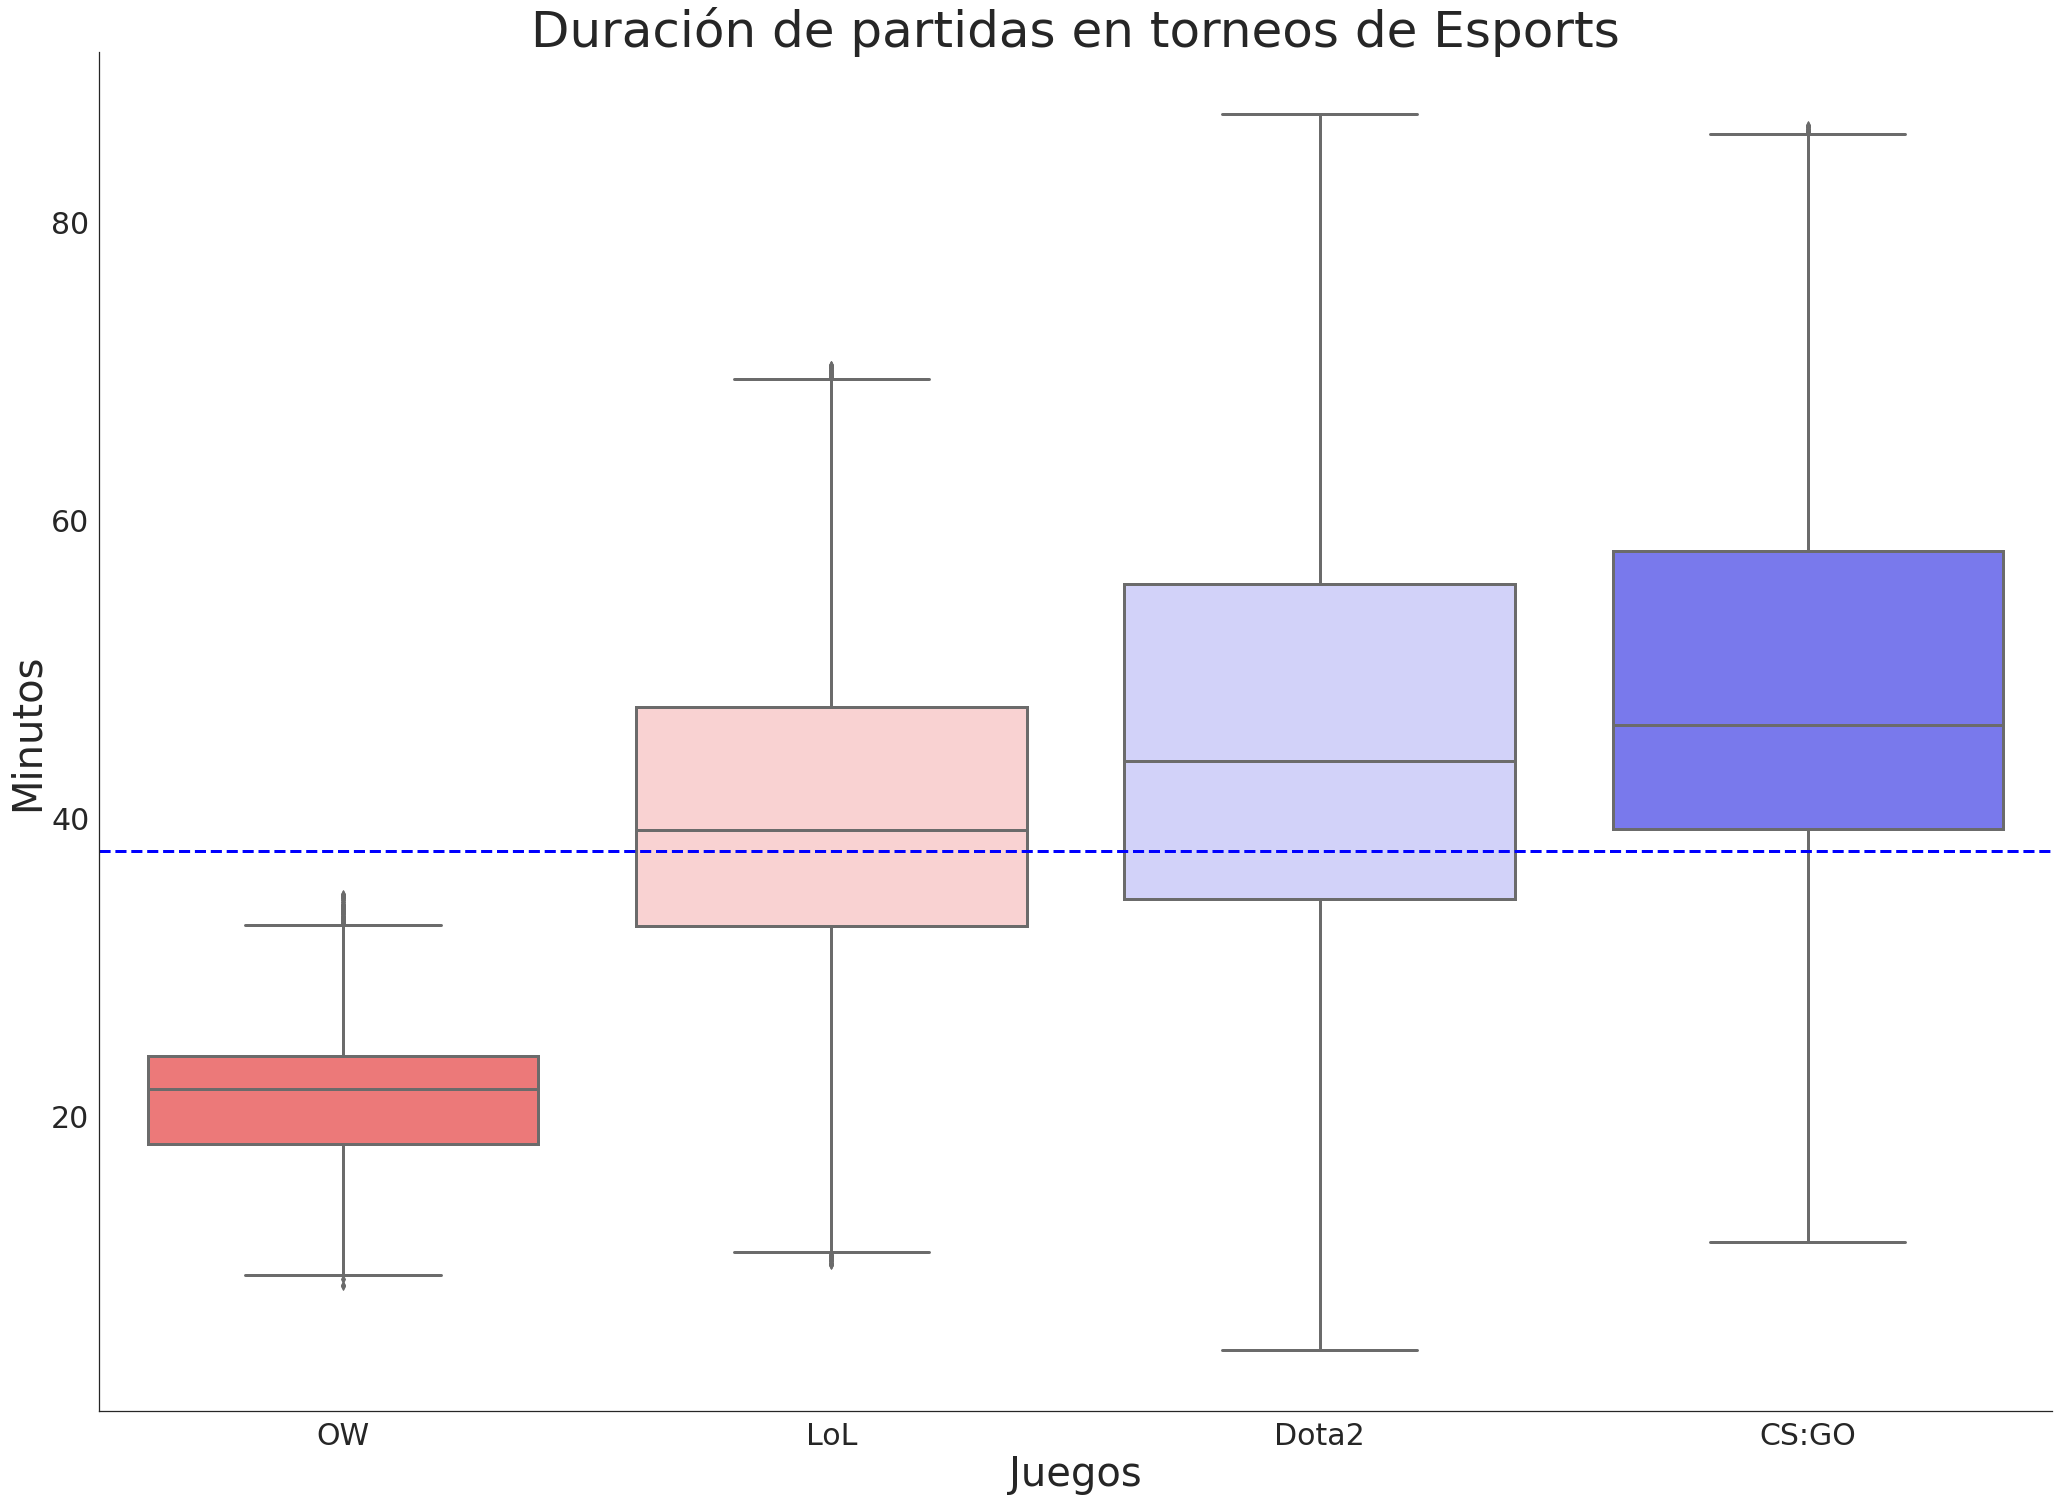

In [ ]:
import matplotlib.pyplot as plt
#llamamos el paquete seaborn
import seaborn as sns
#Diseñamos la figura
plt.figure(figsize=[35, 25])

sns.set(style="white")
graph = sns.boxplot(data=[boxplot_ow['minutos_partidas'],
                  boxplot_lol['minutos_partidas'],
                  boxplot_dota2['minutos_partidas'],
                  boxplot_csgo['minutos_partidas']],
            palette='bwr_r',linewidth=3)

graph.set_xticklabels(['OW','LoL','Dota2','CS:GO'])
graph.axhline(promedio,color='blue', linewidth=3,ls="--", )
sns.despine()            
plt.title("Duración de partidas en torneos de Esports", fontsize = 50)
plt.ylabel("Minutos", fontsize = 40)
plt.yticks(fontsize=30)
plt.xlabel("Juegos", fontsize = 40)
plt.xticks(fontsize=30)
plt.show()


Analizando los resultados de manera muy rápida, encontramos que las medianas rondan en torno a los 25 minutos, 40 minutos, 45 minutos y 50 minutos respectivamente. Si esto llegan a tardar los profesionales, qué nos espera a nosotros los mortales? 